<a href="https://colab.research.google.com/github/syma-afsha/Complete_Reinforcement_Learning/blob/main/Gradient_Bandit_Algorithms_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imagine a scenario where:

**You have multiple slot machines (arms), each with an unknown reward probability. Your goal is to maximize the total reward over time by selecting the best arm(s).**

**Challenges:**

- If you keep choosing the same arm (exploitation), you might miss a better arm.
- If you try too many arms (exploration), you might waste time on bad ones.


Gradient Bandit Algorithms tackle this challenge by:

- Learning preferences for each arm.
- Converting preferences into action probabilities using the softmax distribution.
- Dynamically updating preferences based on the rewards received.




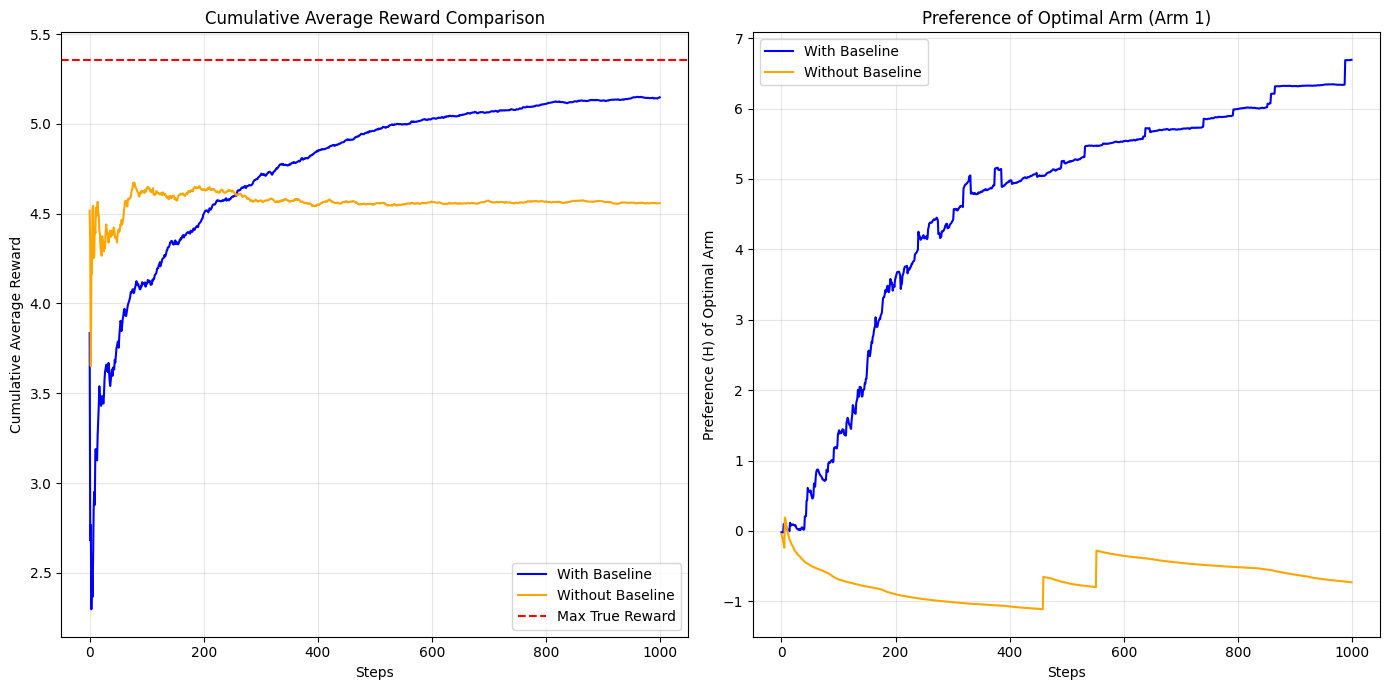

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class GradientBanditTestbed:
    def __init__(self, true_rewards, alpha=0.1, total_steps=1000, use_baseline=True):
        """
        Gradient Bandit Algorithm for 10-Armed Testbed
        Parameters:
            true_rewards: List of true mean rewards for each arm.
            alpha: Step size for updating preferences.
            total_steps: Total number of steps to run the algorithm.
            use_baseline: Whether to use the reward baseline.
        """
        self.true_rewards = np.array(true_rewards)  # True mean rewards for each arm
        self.num_arms = len(true_rewards)          # Number of arms
        self.alpha = alpha                         # Step size
        self.total_steps = total_steps             # Total steps to run
        self.use_baseline = use_baseline           # Use baseline in updates
        self.H = np.zeros(self.num_arms)           # Initial preferences for each arm
        self.baseline = 0                          # Initial baseline (average reward)
        self.action_probs = np.zeros(self.num_arms)  # Probabilities for each action
        self.rewards = []                          # Observed rewards
        self.H_history = []                        # History of preferences
        self.baseline_history = []                 # History of baseline rewards

    def softmax(self):
        """Compute the softmax probabilities for actions based on preferences."""
        exp_H = np.exp(self.H)
        return exp_H / np.sum(exp_H)

    def select_action(self):
        """Select an action based on the softmax probabilities."""
        self.action_probs = self.softmax()
        return np.random.choice(self.num_arms, p=self.action_probs)

    def update_preferences(self, selected_action, reward):
        """Update preferences for selected and non-selected actions."""
        if self.use_baseline:
            self.baseline += (reward - self.baseline) / (len(self.rewards) + 1)  # Update baseline

        baseline = self.baseline if self.use_baseline else 0  # Handle baseline or no baseline
        for arm in range(self.num_arms):
            if arm == selected_action:
                self.H[arm] += self.alpha * (reward - baseline) * (1 - self.action_probs[arm])
            else:
                self.H[arm] -= self.alpha * (reward - baseline) * self.action_probs[arm]

    def run(self):
        """Run the Gradient Bandit Algorithm."""
        for step in range(self.total_steps):
            action = self.select_action()
            reward = np.random.normal(self.true_rewards[action], 1)  # Generate reward
            self.rewards.append(reward)
            self.update_preferences(action, reward)
            self.H_history.append(self.H.copy())
            self.baseline_history.append(self.baseline)

# Parameters
num_arms = 10
true_rewards_shifted = np.random.normal(4.0, 1.0, num_arms)  # True rewards with mean +4 and variance 1
alpha = 0.1
total_steps = 1000

# Run with and without baseline
bandit_with_baseline = GradientBanditTestbed(true_rewards_shifted, alpha, total_steps, use_baseline=True)
bandit_with_baseline.run()

bandit_without_baseline = GradientBanditTestbed(true_rewards_shifted, alpha, total_steps, use_baseline=False)
bandit_without_baseline.run()

# Plot Results
plt.figure(figsize=(14, 7))

# Plot cumulative average reward
plt.subplot(1, 2, 1)
cumulative_rewards_with_baseline = np.cumsum(bandit_with_baseline.rewards) / np.arange(1, total_steps + 1)
cumulative_rewards_without_baseline = np.cumsum(bandit_without_baseline.rewards) / np.arange(1, total_steps + 1)
plt.plot(cumulative_rewards_with_baseline, label="With Baseline", color="blue")
plt.plot(cumulative_rewards_without_baseline, label="Without Baseline", color="orange")
plt.axhline(np.max(true_rewards_shifted), color="red", linestyle="--", label="Max True Reward")
plt.xlabel("Steps")
plt.ylabel("Cumulative Average Reward")
plt.title("Cumulative Average Reward Comparison")
plt.legend()
plt.grid(alpha=0.3)

# Plot preferences for the optimal arm
optimal_arm = np.argmax(true_rewards_shifted)
plt.subplot(1, 2, 2)
plt.plot([H[optimal_arm] for H in bandit_with_baseline.H_history], label="With Baseline", color="blue")
plt.plot([H[optimal_arm] for H in bandit_without_baseline.H_history], label="Without Baseline", color="orange")
plt.xlabel("Steps")
plt.ylabel("Preference (H) of Optimal Arm")
plt.title(f"Preference of Optimal Arm (Arm {optimal_arm})")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


From the graphs, the baseline allows for faster and more stable learning, enabling the algorithm to reach near-optimal performance. Without it, the algorithm's performance is degraded due to instability and slower convergence.

Without the baseline, preferences for an arm are adjusted only based on the reward's absolute value. High or low rewards cause large preference changes, leading to larger spikes. This destabilizes learning and slows convergence.

In contrast, using a baseline (𝑅𝑡−𝑅ˉ𝑡) ensures updates depend on whether the reward is above or below average, stabilizing the learning process. It balaces the exploitation and exploration.


**Non Stationary Environment**

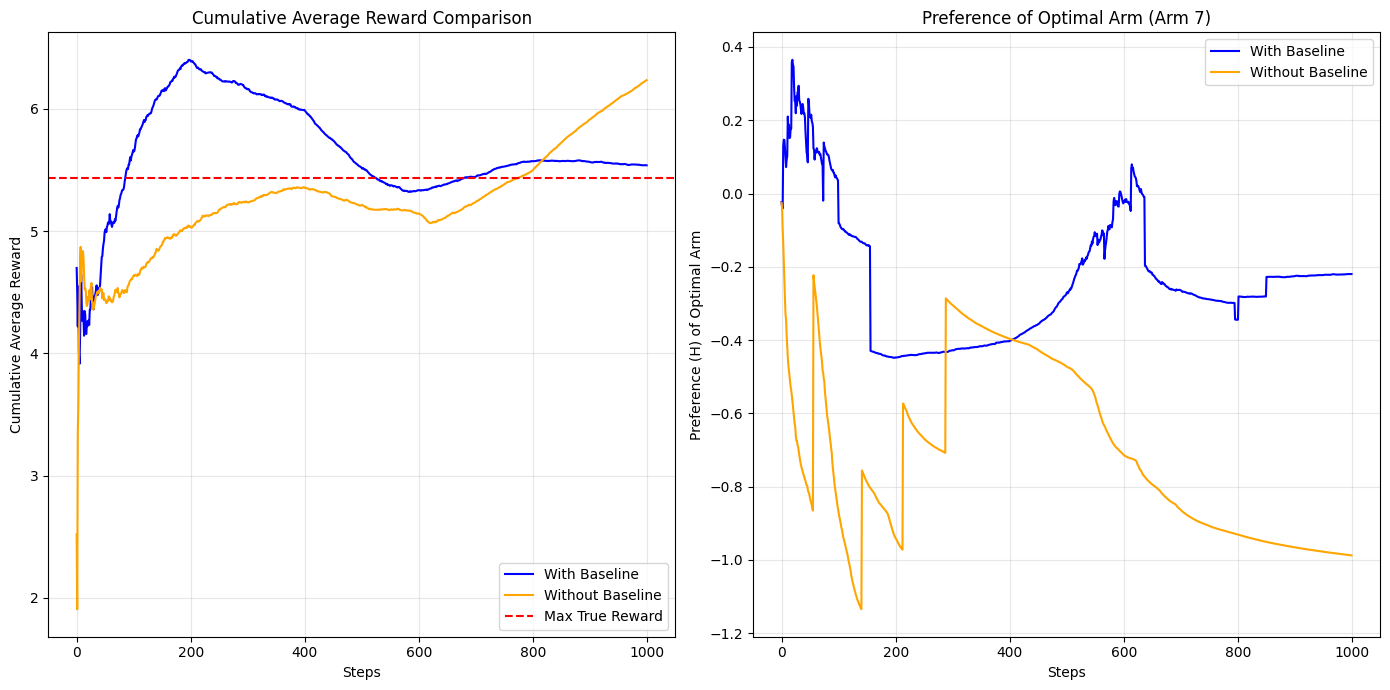

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class GradientBanditTestbed:
    def __init__(self, true_rewards, alpha=0.1, total_steps=1000, use_baseline=True):
        """
        Gradient Bandit Algorithm for 10-Armed Testbed
        Parameters:
            true_rewards: List of true mean rewards for each arm.
            alpha: Step size for updating preferences.
            total_steps: Total number of steps to run the algorithm.
            use_baseline: Whether to use the reward baseline.
        """
        self.true_rewards = np.array(true_rewards)  # True mean rewards for each arm
        self.num_arms = len(true_rewards)          # Number of arms
        self.alpha = alpha                         # Step size
        self.total_steps = total_steps             # Total steps to run
        self.use_baseline = use_baseline           # Use baseline in updates
        self.H = np.zeros(self.num_arms)           # Initial preferences for each arm
        self.baseline = 0                          # Initial baseline (average reward)
        self.action_probs = np.zeros(self.num_arms)  # Probabilities for each action
        self.rewards = []                          # Observed rewards
        self.H_history = []                        # History of preferences
        self.baseline_history = []                 # History of baseline rewards

    def softmax(self):
        """Compute the softmax probabilities for actions based on preferences."""
        exp_H = np.exp(self.H - np.max(self.H))  # Numerical stability for large H
        return exp_H / np.sum(exp_H)

    def select_action(self):
        """Select an action based on the softmax probabilities."""
        self.action_probs = self.softmax()
        return np.random.choice(self.num_arms, p=self.action_probs)

    def update_preferences(self, selected_action, reward):
        """Update preferences for selected and non-selected actions."""
        if self.use_baseline:
            self.baseline += (reward - self.baseline) / (len(self.rewards) + 1)  # Update baseline

        baseline = self.baseline if self.use_baseline else 0  # Handle baseline or no baseline
        for arm in range(self.num_arms):
            if arm == selected_action:
                self.H[arm] += self.alpha * (reward - baseline) * (1 - self.action_probs[arm])
            else:
                self.H[arm] -= self.alpha * (reward - baseline) * self.action_probs[arm]

    def run(self):
        """Run the Gradient Bandit Algorithm."""
        for step in range(self.total_steps):
            if step % 200 == 0:
                # Introduce non-stationarity
                self.true_rewards += np.random.normal(0, 1.0, self.num_arms)

            action = self.select_action()
            reward = np.random.normal(self.true_rewards[action], 1)  # Generate reward
            self.rewards.append(reward)
            self.update_preferences(action, reward)
            self.H_history.append(self.H.copy())
            self.baseline_history.append(self.baseline)

# Parameters
num_arms = 10
true_rewards_shifted = np.random.normal(4.0, 1.0, num_arms)  # True rewards with mean +4 and variance 1
alpha = 0.1
total_steps = 1000

# Run with and without baseline
bandit_with_baseline = GradientBanditTestbed(true_rewards_shifted, alpha, total_steps, use_baseline=True)
bandit_with_baseline.run()

bandit_without_baseline = GradientBanditTestbed(true_rewards_shifted, alpha, total_steps, use_baseline=False)
bandit_without_baseline.run()

# Plot Results
plt.figure(figsize=(14, 7))

# Plot cumulative average reward
plt.subplot(1, 2, 1)
cumulative_rewards_with_baseline = np.cumsum(bandit_with_baseline.rewards) / np.arange(1, total_steps + 1)
cumulative_rewards_without_baseline = np.cumsum(bandit_without_baseline.rewards) / np.arange(1, total_steps + 1)
plt.plot(cumulative_rewards_with_baseline, label="With Baseline", color="blue")
plt.plot(cumulative_rewards_without_baseline, label="Without Baseline", color="orange")
plt.axhline(np.max(true_rewards_shifted), color="red", linestyle="--", label="Max True Reward")
plt.xlabel("Steps")
plt.ylabel("Cumulative Average Reward")
plt.title("Cumulative Average Reward Comparison")
plt.legend()
plt.grid(alpha=0.3)

# Plot preferences for the optimal arm
optimal_arm = np.argmax(true_rewards_shifted)
plt.subplot(1, 2, 2)
plt.plot([H[optimal_arm] for H in bandit_with_baseline.H_history], label="With Baseline", color="blue")
plt.plot([H[optimal_arm] for H in bandit_without_baseline.H_history], label="Without Baseline", color="orange")
plt.xlabel("Steps")
plt.ylabel("Preference (H) of Optimal Arm")
plt.title(f"Preference of Optimal Arm (Arm {optimal_arm})")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


**Non-stationary environments introduce sudden shifts in true rewards. The baseline helps mitigate the impact of these changes by focusing on relative performance rather than absolute rewards.**